# MPSC EDA
<hr >

> In this notebook we will go through the data, interprets them, make visualization and put notes

## Table Of Content
<hr >

> 1. [Introduction](#Introduction)
> 2. [Imports and Load](#Imports-and-Load)
> 3. [Split the data](#Split-the-data)
> 4. [Diving into Data](#Diving-into-Data)
>     - [make some analysis and plot charts](#make-some-analysis-and-plot-charts)
>     - [fetures corrolation with our Target (price)](#fetures-corrolation-with-our-Target-(price))
>     - [category_name analysis](#category_name-analysis)
>     - [brand_name analysis](#brand_name-analysis)
>     - [name analysis](#name-analysis)
>     - [description analysis](#description-analysis)
>     - [price values needs more to discuss](#price-values-needs-more-to-discuss)

## Introduction
<hr >

### [Data Description](https://www.kaggle.com/c/mercari-price-suggestion-challenge/data)
>In this competition, you will predict the sale price of a listing based on information a user provides for this listing.
>
>#### Data fields
>##### train.tsv, test.tsv
>The files consist of a list of product listings. These files are tab-delimited.
> 1. **train_id** or **test_id** - the id of the listing
> 2. **name** - the title of the listing. Note that we have cleaned the data to remove text that look like prices (e.g. \$20) to avoid leakage. These removed prices are represented as [rm]
> 3. **item_condition_id** - the condition of the items provided by the seller
> 4. **category_name** - category of the listing
> 5. **brand_name**
> 6. **price** - the price that the item was sold for. This is the target variable that you will predict. The unit is USD. This column doesn't exist in test.tsv since that is what you will predict.
> 7. **shipping** - 1 if shipping fee is paid by seller and 0 by buyer
> 8. **item_description** - the full description of the item. Note that we have cleaned the data to remove text that look like prices (e.g. \$20) to avoid leakage. These removed prices are represented as [rm]

## Imports and Load
<hr >

> Next step is to import the libraries requierd for our analysis, define usefull constents, then load the data and make quick overview

In [1]:
import os
import pandas as pd # for loading data and display tabualer data
import numpy as np # for applying mathmatical operations
import matplotlib.pyplot as plt # for creating interactive visualizations
import seaborn as sns # data visualization library based on matplotlib
from wordcloud import WordCloud, STOPWORDS
import fasttext # used here for language detection
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = '../data/' # the training file path, change the path if you have it in another dir
MODELS_PATH = '../models/'
TARGET = 'price'

In [3]:
def plot_hist(series_, bins, title, figsize=(16, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title=title)
    series_.hist(bins=bins)
    plt.axvline(series_.mean(), color='r', linestyle='dashed', linewidth=2)
    
def plot_bars(title, data, x, y, n_bars, figsize=(16, 4), palette='Blues_r', rotation=45, horizontalalignment='right'):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title=title)
    sns.barplot(data=data.iloc[:n_bars], x=x, y=y, palette=sns.color_palette(palette, n_colors=n_bars+n_bars//6), ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, horizontalalignment=horizontalalignment)
    plt.show()
    
def plot_violin(data, x, y, hue, figsize=(16, 4), rotation=45, horizontalalignment='right'):
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=df, x=x, y=y, hue=hue)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, horizontalalignment=horizontalalignment)
    plt.show()
    
def plot_wordclouds(dfs, sub_titles, title, figsize=(24, 16)):
    len_dfs = len(dfs)
    plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.suptitle(title, fontsize=18, y=0.95)
    for i in range(len_dfs):
        wordcloud.generate(' '.join(dfs[i]))
        ax = plt.subplot(int(np.ceil(len_dfs/ 3)), 3, i+1)
        ax.set_title(f'{sub_titles[i]}', fontsize=16)
        plt.imshow(wordcloud)
        plt.axis('off')
    
wordcloud = WordCloud(background_color="white", max_font_size=50, max_words=1000, stopwords=STOPWORDS)
fmodel = fasttext.load_model(MODELS_PATH+ 'lid.176.ftz')

## Split the data
<hr >

> We will split the data into train and test sets, so for training and validate the the model results we will only allowed to use **mpsc_train.csv**, and for the infernce we will use **mpsc_test.csv**

**Note:**
>make sure you have **train.tsv** file, you can find it in this [link](https://www.kaggle.com/c/mercari-price-suggestion-challenge/data?select=train.tsv.7z), you need to sign in and accept the rules.

In [4]:
if not os.path.exists(DATA_PATH+ 'mpsc_train.csv'):
    print('This is the first run, we will split the dataset to train and test!')
    df = pd.read_table(DATA_PATH+ 'train.tsv')
    df_train, df_test = train_test_split(df, random_state=123, train_size=0.8)
    df_train.to_csv(DATA_PATH+ 'mpsc_train.csv', index=False)
    df_test.to_csv(DATA_PATH+ 'mpsc_test.csv', index=False)
    del df, df_train, df_test
    
df = pd.read_csv(DATA_PATH+ 'mpsc_train.csv')
df

train_id                                      name  \
0           16705        Hot wheels f&f nissan skyline gt-r   
1         1243613                     Summer haze callahans   
2          225004   American Apparel Long Sleeve Bodysuit M   
3          583451                          Hand Turned Pens   
4          983127                           Nike sports bra   
...           ...                                       ...   
1186023   1241052         Urban Decay Naked Skin Foundation   
1186024   1066306                        VS LOVE SPELL MIST   
1186025     28030                     F21 Floral Sweatshirt   
1186026    277869                     Necklace pearl stones   
1186027    773630  Rosetta Stone Espanol "Totale" Level 1-3   

         item_condition_id                       category_name  \
0                        1      Vintage & Collectibles/Toy/Car   
1                        3       Women/Athletic Apparel/Shorts   
2                        1     Women/Tops & Blouses/Tank, Cami   
3                        1       Other/Office supplies/Writing   
4                        3  Women/Athletic Apparel/Sports Bras   
...                    ...                                 ...   
1186023                  3       Beauty/Makeup/Makeup Palettes   
1186024                  1              Beauty/Fragrance/Women   
1186025                  2             Women/Sweaters/Crewneck   
1186026                  1             Women/Jewelry/Necklaces   
1186027                  2    Other/Books/Education & Teaching   

                brand_name  price  shipping  \
0               Hot Wheels    6.0         1   
1           Lilly Pulitzer   20.0         0   
2         American Apparel   10.0         1   
3                      NaN   50.0         1   
4                     Nike   10.0         0   
...                    ...    ...       ...   
1186023                NaN   15.0         1   
1186024  Victoria's Secret   13.0         0   
1186025         FOREVER 21   14.0         0   
1186026                NaN   23.0         0   
1186027                NaN   61.0         0   

                                          item_description  
0                                             Soft corners  
1                                                   Size 0  
2        American Apparel Cotton Spandex Jersey Contras...  
3                                        Reserved for Gail  
4        Neon sports bra. Wear a handful of time, but I...  
...                                                    ...  
1186023  About 80% or more full, no lid. Shade 2.0. Loo...  
1186024                                Brand new 8.4 fl oz  
1186025  I'm not sure if my daughter ever wore this. It...  
1186026  jewelry necklace, Biwa Pearl Stones, 19.5 inch...  
1186027     Spanish Latin America version levels 1,2 and 3  

[1186028 rows x 8 columns]

<hr >

**Noticed from the table above:**
> - we have about 1.1M recoreds
> - train_id can be droped
> - category_name has the format "$a$/$b$/$c$", ex: "Women/Jewelry/Necklaces".
>
> > where:
> > $a$ is **main category**, $b$ is **sub_1 category** and $c$ is **sub_2 category**
> >
> > this hipothesis needs more investigation
> >
> > **update**:
> > from below testing we found that some data points dont follow this rule

In [5]:
# drop train_id
df.drop('train_id', axis=1, inplace=True)
df.columns

Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'price',
       'shipping', 'item_description'],
      dtype='object')

In [6]:
# lets check the category_name and if our hypothesis about "a/b/c" format is valid for all non-na values
series_catname = df['category_name'].dropna()
series_istrue = series_catname.apply(lambda x: len(x.split('/'))) == 3
if (series_istrue).all():
    print("[+] correct hypothesis: all category_name points has the \"a/b/c\" format")
else:
    print("[-] invalid hypothesis: needs more investigation")

[-] invalid hypothesis: needs more investigation


In [7]:
display(series_catname[series_istrue == False])
series_catname[series_istrue == False].apply(lambda x: len(x.split('/'))).drop_duplicates()

863                  Sports & Outdoors/Exercise/Dance/Ballet
936          Sports & Outdoors/Outdoors/Indoor/Outdoor Games
1474                 Sports & Outdoors/Exercise/Dance/Ballet
2031                 Sports & Outdoors/Exercise/Dance/Ballet
2215       Electronics/Computers & Tablets/iPad/Tablet/eB...
                                 ...                        
1182123    Electronics/Computers & Tablets/iPad/Tablet/eB...
1182848    Electronics/Computers & Tablets/iPad/Tablet/eB...
1184526              Sports & Outdoors/Exercise/Dance/Ballet
1184647    Electronics/Computers & Tablets/iPad/Tablet/eB...
1184689    Electronics/Computers & Tablets/iPad/Tablet/eB...
Name: category_name, Length: 3516, dtype: object

863     4
2215    5
Name: category_name, dtype: int64

<hr >

**Noticed from the series above:**
> - about 0.3% of the data points **don't** follow "$a$/$b$/$c$" format in **category_name**, insted we can find more two catigories "$a$/$b$/$c$/$d$" and "$a$/$b$/$c$/$d$/$e$", and these are the only possible **category_name** formats it can be
>
> > ex. "Men/Coats & Jackets/Flight/Bomber"
>
> >how can we deal with these data points:
> >1. we can just stick with the first 3 catigores, but this means we will loss some information
> >
> > > ex. "Men/Coats & Jackets/Flight/Bomber" \-\> "Men/Coats & Jackets/Flight"
> >
> >
> >2. we can combine last sub categories "$a$/$b$/$c$-$d$-$e$", maybe the best soliotion, no information loss and memory friendly
> >
> > > ex. "Electronics/Computers & Tablets/iPad/Tablet/eBook Readers" \-\> "Electronics/Computers & Tablets/iPad-Tablet-eBook Readers"
> >
> >3. we can convert all **category_name** fields to have the format "$a$/$b$/$c$/$d$/$e$" and replace missing categories with the word "Other", but this will consume more memory
> >
> > > ex. "Women/Jewelry/Necklaces" \-\> "Women/Jewelry/Necklaces/Other/Other"

## Diving into Data
<hr >

In [8]:
#Lets start with check missing values
display(df.isna().sum())

name                      0
item_condition_id         0
category_name          5038
brand_name           505941
price                     0
shipping                  0
item_description          3
dtype: int64

<hr >

**Noticed from the series above:**
> **category_name**, **brand_name** and **item_description** have missing values

In [9]:
# fill-na with resonable values for each column
df['category_name'] = df['category_name'].fillna('Other/Other/Other')
df['brand_name'] = df['brand_name'].fillna('Other')
df['item_description'] = df['item_description'].fillna('No description yet')
df['nwords_name'] = df['name'].apply(lambda x: len(x.split()))
df['nwords_desc'] = df['item_description'].apply(lambda x: len(x.split()))
# split category_name to 3 subs
df['main_cat'] = df['category_name'].apply(lambda x: x.split('/', maxsplit=2)[0])
df['sub1_cat'] = df['category_name'].apply(lambda x: x.split('/', maxsplit=2)[1])
df['sub2_cat'] = df['category_name'].apply(lambda x: x.split('/', maxsplit=2)[2])

### Make some analysis and plot charts

Mean price is 26.738947562789413


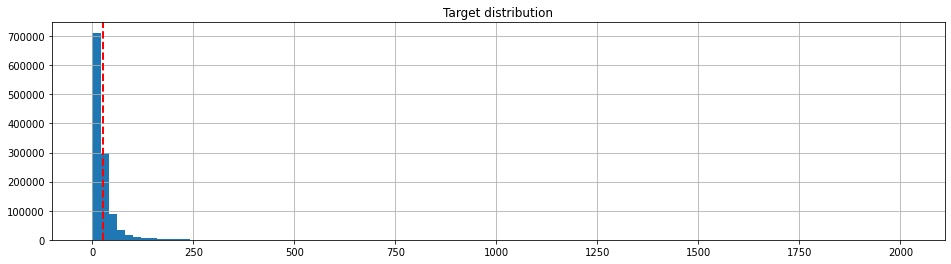

In [10]:
# First thing we can plot is the Target distribution
plot_hist(df[TARGET], bins=100, title='Target distribution')
mean_price = df[TARGET].mean()
print(f'Mean price is {mean_price}')

**We can see from the above chart:**
> - the ranges of the Target **price** lies bettwen 0 and about 2000
> - items with high prices are less frequent and almost all items lies in the (0, 250( range

### Fetures corrolation with our Target (price)

In [11]:
df.corr()[[TARGET]].sort_values(TARGET).iloc[1:-1].style.background_gradient(cmap='coolwarm')

### category_name analysis

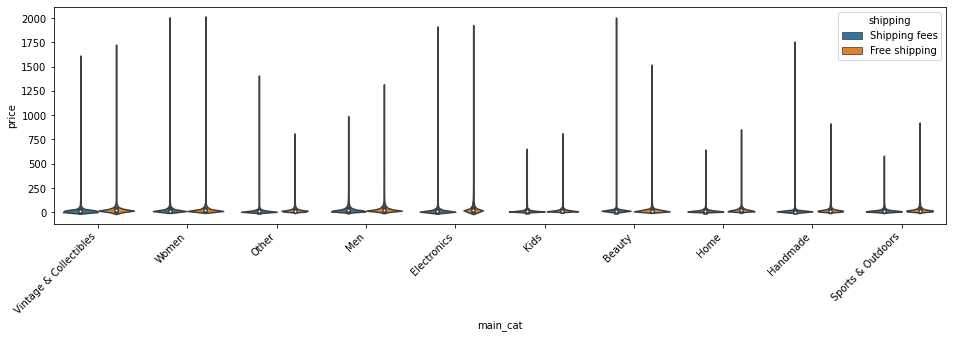

In [12]:
# plot the prices of each main category and shipping fees
df['shipping'] = df['shipping'].map({0: 'Free shipping', 1: 'Shipping fees'})
plot_violin(data=df, x='main_cat', hue='shipping', y='price')

**Notes:**
> - this chart is hardly describable because of outlaiers in the Target values
>> how can we deal with this issue
>> 1. we can drop these outlaiers, but we may loss some of the recoreds
>> 2. we can rescale the Target values, will use $log(x + 1)$ for this manner

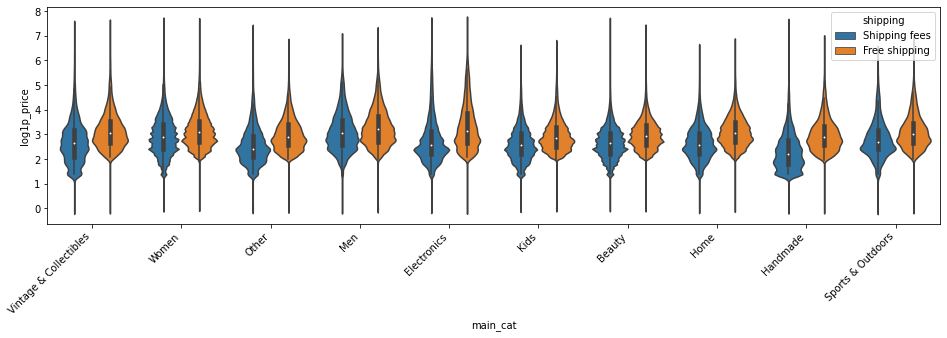

In [13]:
# plot the log of prices of each main category and shipping fees
df['log1p_price'] = np.log1p(df['price'])
plot_violin(data=df, x='main_cat', hue='shipping', y='log1p_price')

**Now we can see more clear results:**
> - we can see the scaled Target distribution for each main category
> - when add **shipping fees** the mean price go lower and thats true for all main categories

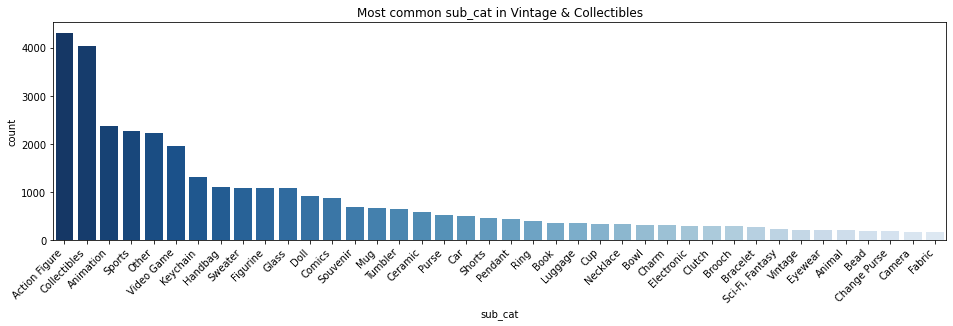

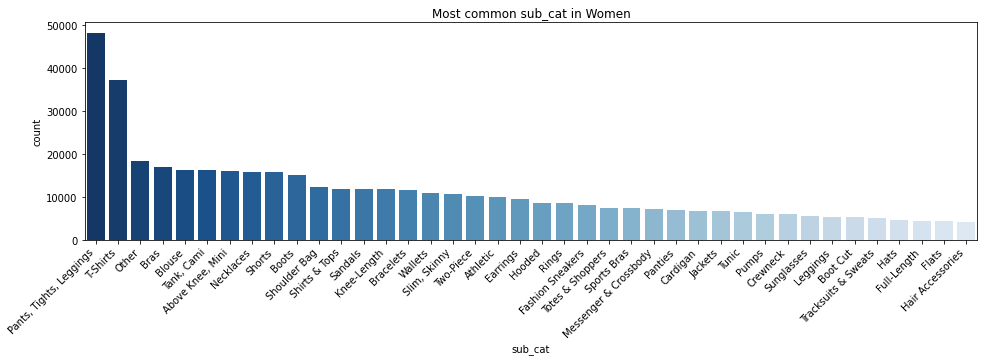

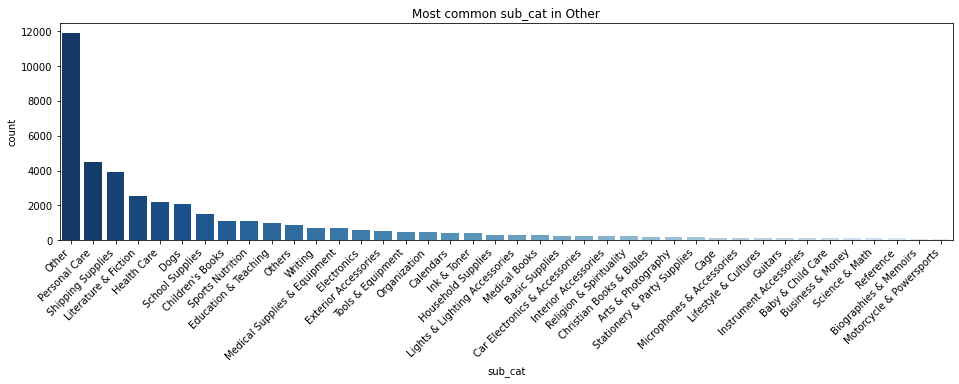

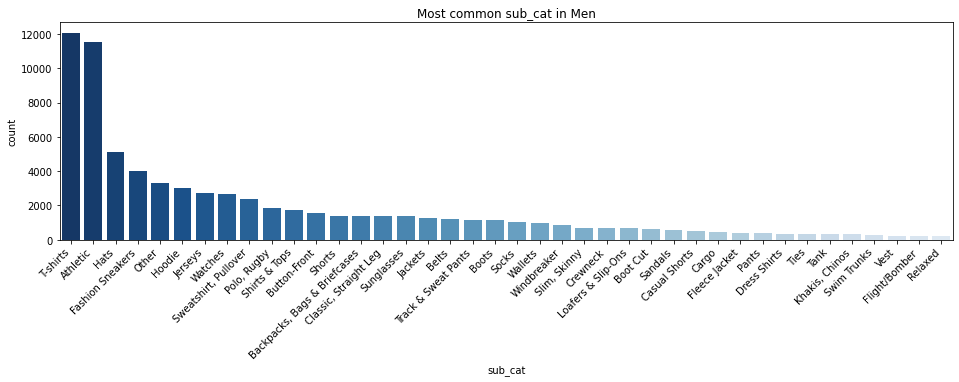

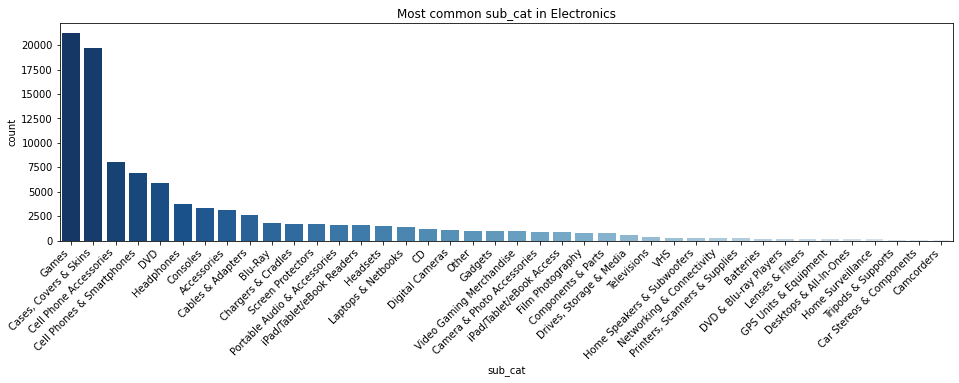

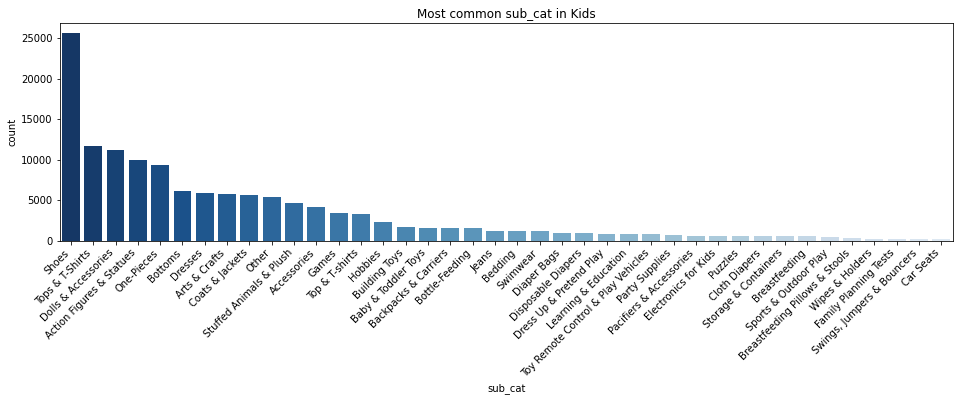

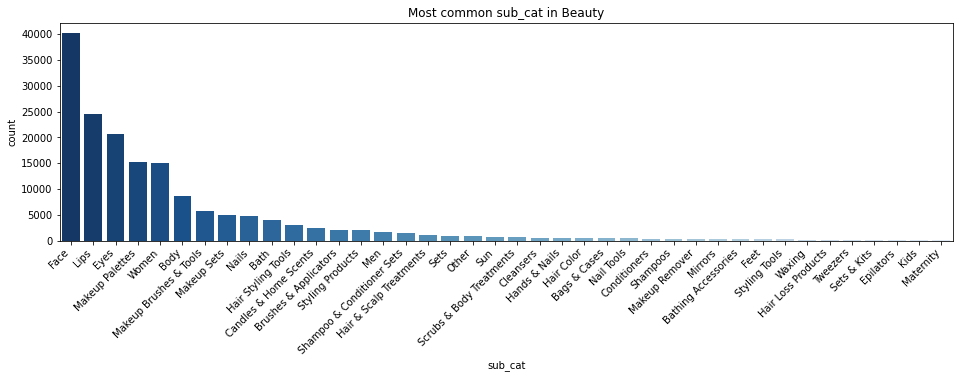

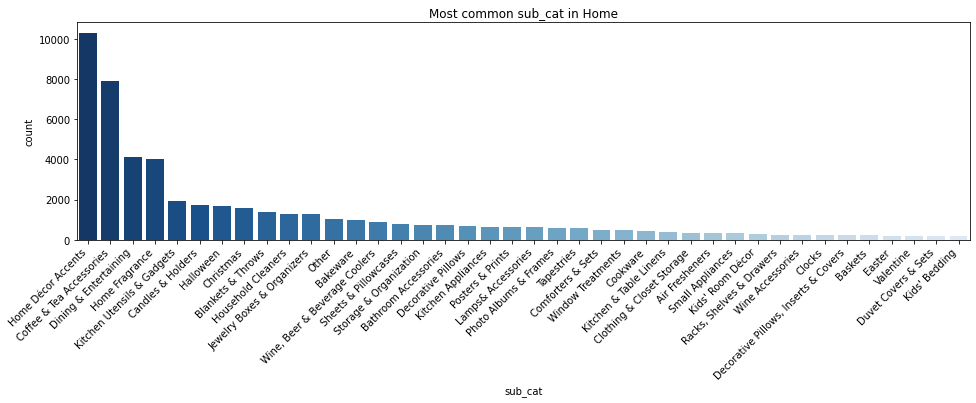

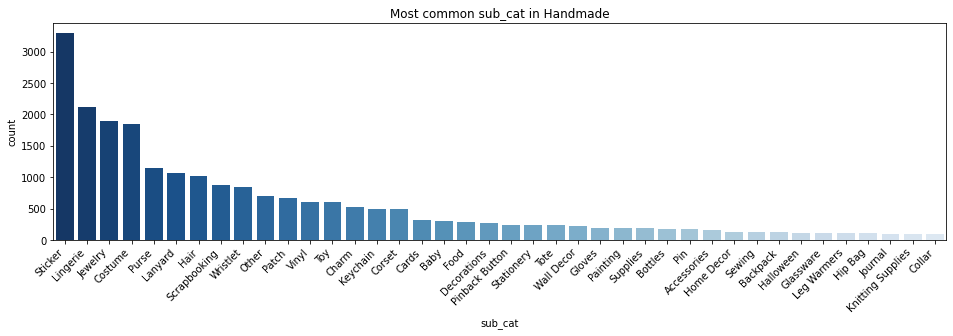

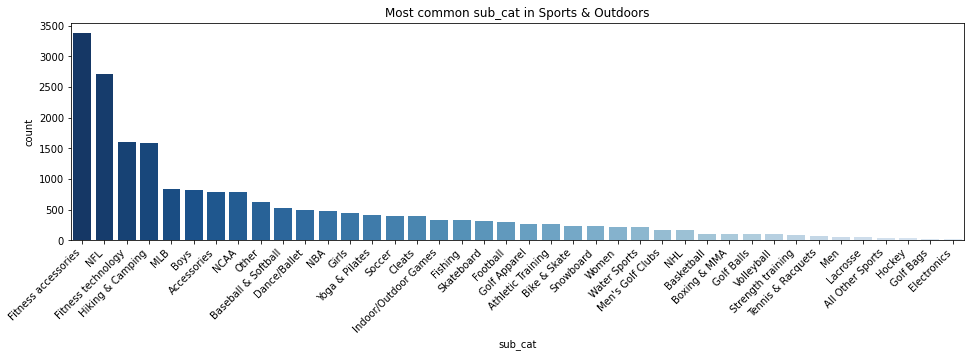

In [14]:
df_mc = df.groupby(['main_cat', 'sub2_cat'])[TARGET].count().sort_values(ascending=False).reset_index()
df_mc.columns = ['main_cat', 'sub_cat', 'count']
for mc in df['main_cat'].unique():
    df_ = df_mc[df_mc['main_cat'] == mc]
    plot_bars(f'Most common sub_cat in {mc}', df_, x='sub_cat', y='count', n_bars=40)

### brand_name analysis

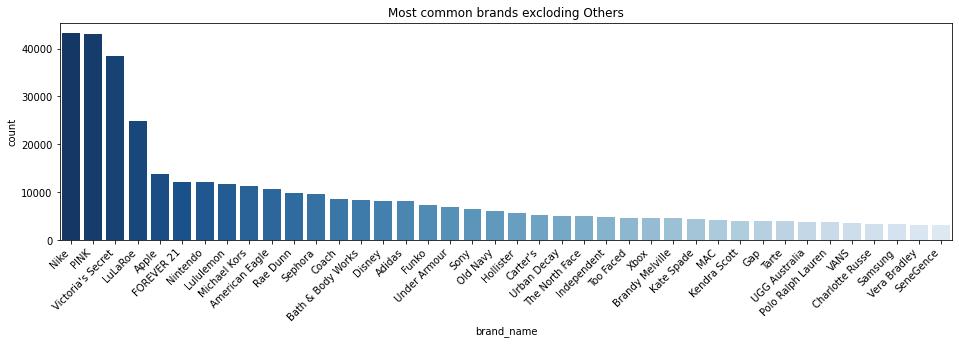

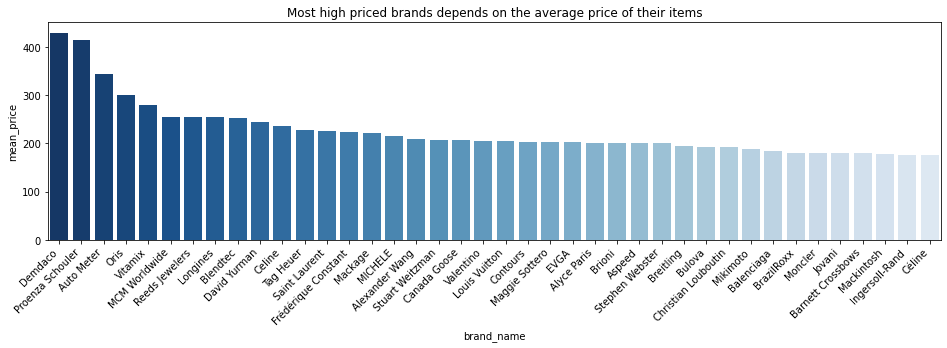

In [15]:
# plot the most common brands
df_ = df[df['brand_name'] != 'Other'].groupby('brand_name')[TARGET].count().reset_index()
df_.columns = ['brand_name', 'count']
df_ = df_.sort_values('count', ascending=False)
plot_bars('Most common brands excloding Others', df_, x='brand_name', y='count', n_bars=40)

# plot the most high priced brand names depends on the average sale price of their items
df_ = df.groupby('brand_name')[TARGET].mean().reset_index()
df_.columns = ['brand_name', 'mean_price']
df_ = df_.sort_values('mean_price', ascending=False)
plot_bars('Most high priced brands depends on the average price of their items', df_, x='brand_name', y='mean_price', n_bars=40)

### name analysis

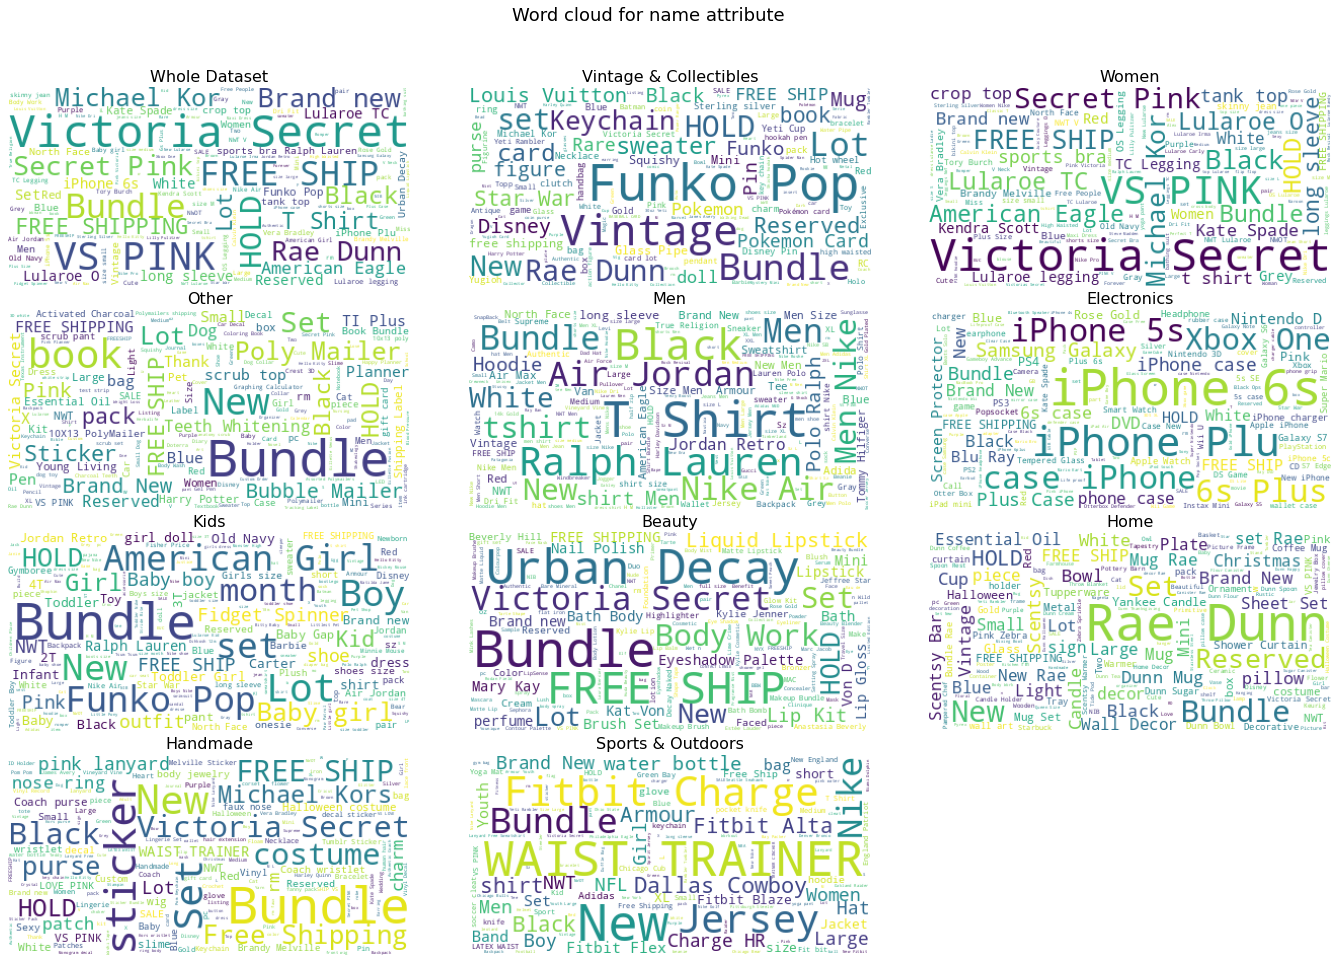

In [16]:
mcs = list(df['main_cat'].unique())
plot_wordclouds(
    [df['name']]+ [df.loc[df['main_cat'] == mc, 'name'] for mc in mcs],
    ['Whole Dataset']+ mcs,
    'Word cloud for name attribute')

Average number of words in name: 4.4 words


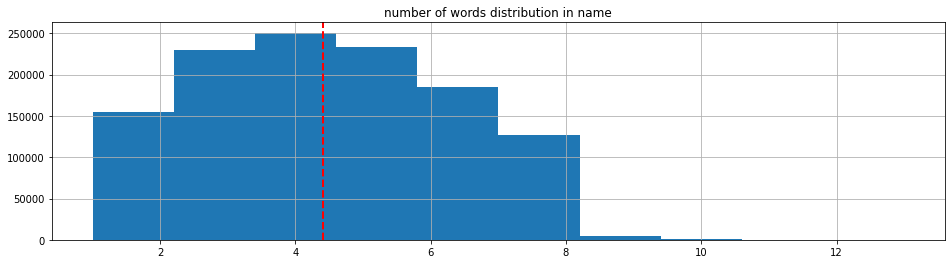

In [17]:
series_ = df['name'].apply(lambda x: len(x.split()))
plot_hist(series_, bins=10, title='number of words distribution in name')
print(f'Average number of words in name: {series_.mean():.1f} words')

#### Lets check for language used to name items

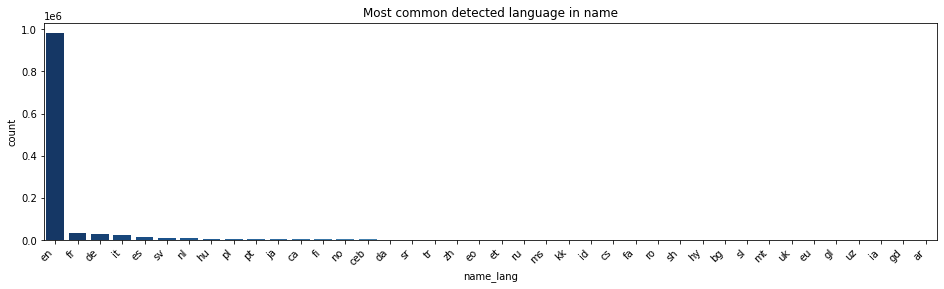

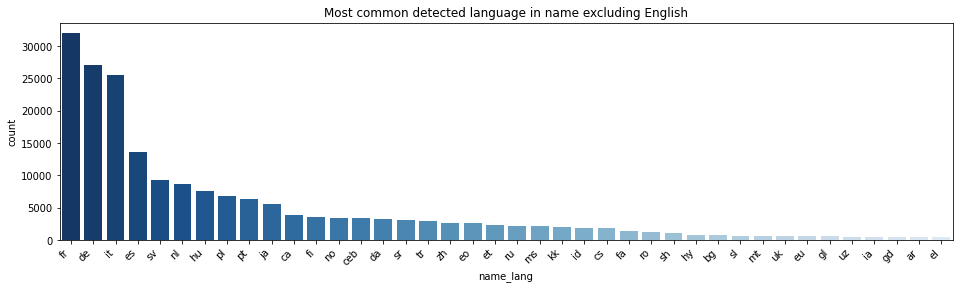

In [18]:
df['name_lang'] = df['name'].apply(lambda x: fmodel.predict(x, k=1)[0][0][len('__label__'):])
df_ = df.groupby('name_lang')['name'].count().reset_index()
df_.columns = ['name_lang', 'count']
df_ = df_.sort_values('count', ascending=False)

plot_bars('Most common detected language in name', df_, x='name_lang', y='count', n_bars=40)
plot_bars('Most common detected language in name excluding English', df_.iloc[1:], x='name_lang', y='count', n_bars=40)

### description analysis

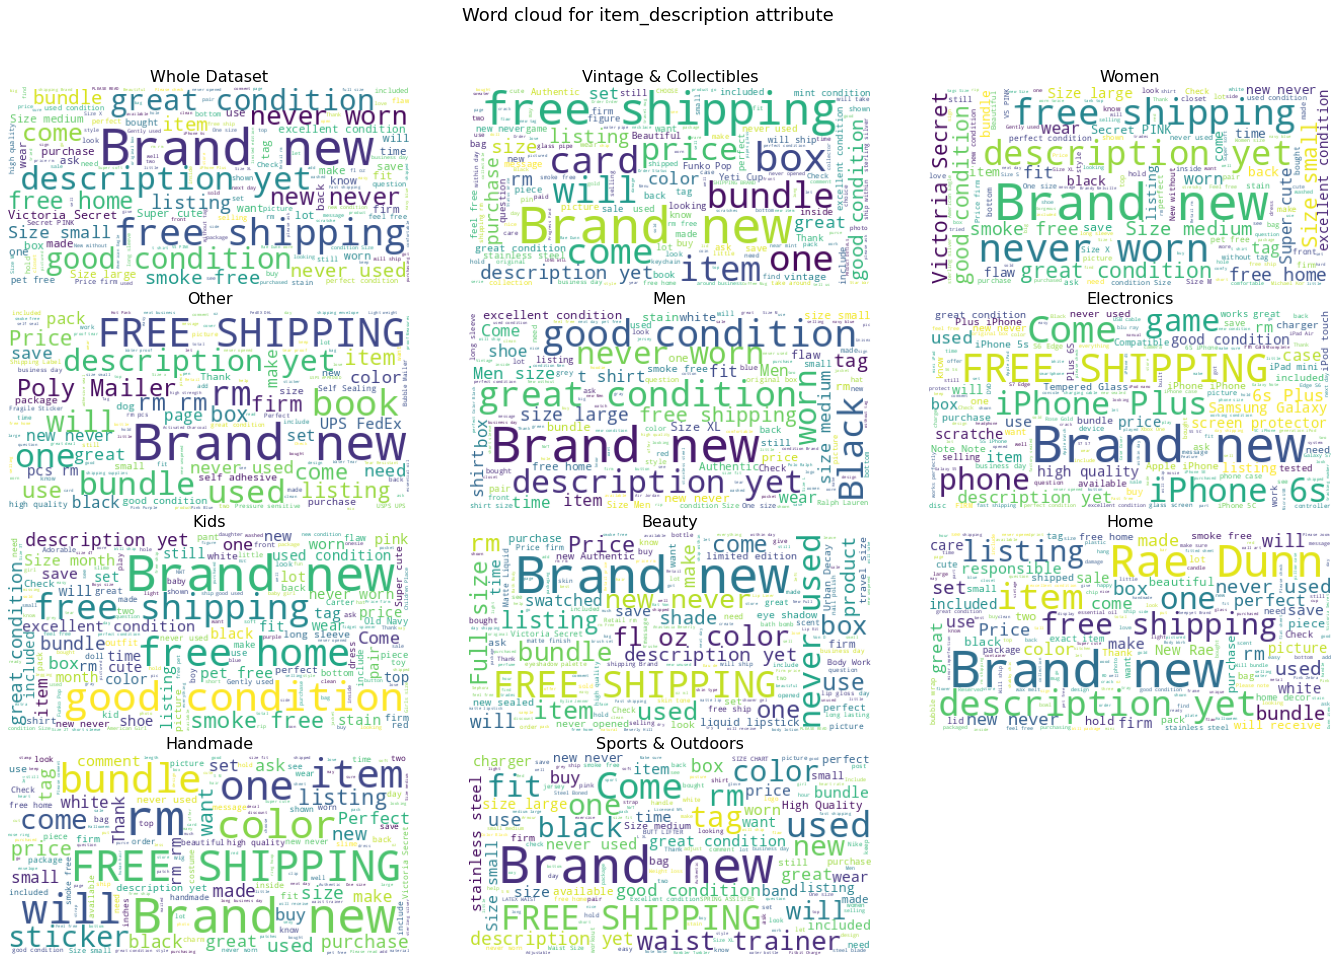

In [19]:
mcs = list(df['main_cat'].unique())
plot_wordclouds(
    [df['item_description']]+ [df.loc[df['main_cat'] == mc, 'item_description'] for mc in mcs],
    ['Whole Dataset']+ mcs,
    'Word cloud for item_description attribute')

Average number of words in item_description: 25.7 words


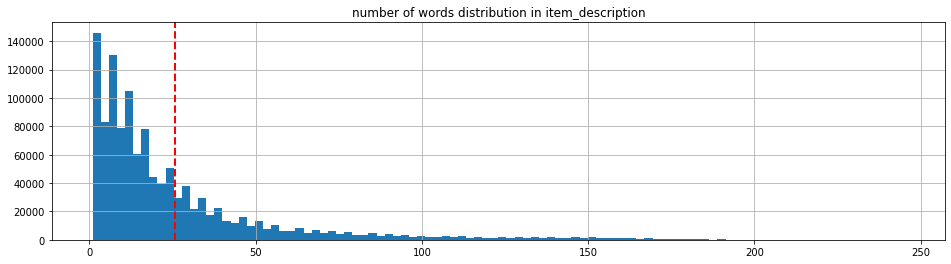

In [20]:
series_ = df['item_description'].apply(lambda x: len(x.split()))
plot_hist(series_, bins=100, title='number of words distribution in item_description')
print(f'Average number of words in item_description: {series_.mean():.1f} words')

#### Lets check for language used to descripe items

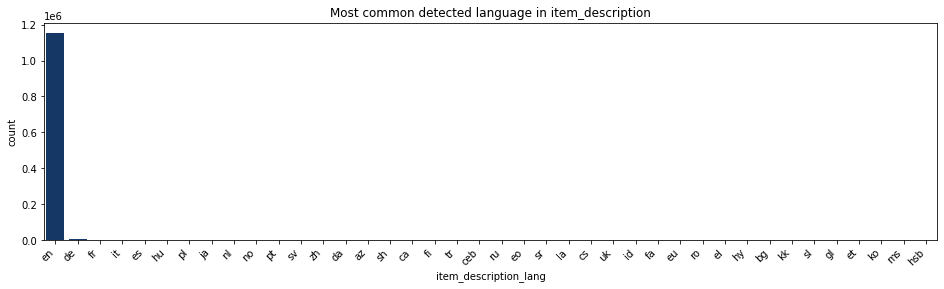

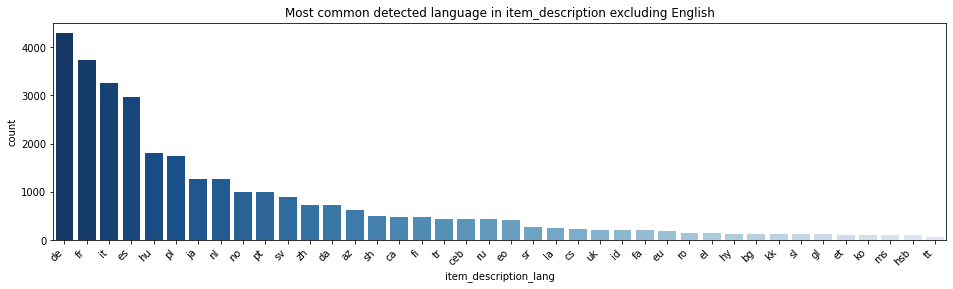

In [21]:
df['item_description_lang'] = df['item_description'].apply(lambda x: fmodel.predict(x, k=1)[0][0][len('__label__'):])
df_ = df.groupby('item_description_lang')['name'].count().reset_index()
df_.columns = ['item_description_lang', 'count']
df_ = df_.sort_values('count', ascending=False)

plot_bars('Most common detected language in item_description', df_, x='item_description_lang', y='count', n_bars=40)
plot_bars('Most common detected language in item_description excluding English', df_.iloc[1:], x='item_description_lang', y='count', n_bars=40)

### price values needs more to discuss

In [22]:
df.groupby('price')['name'].count()

price
0.0         701
3.0       14960
4.0       12930
5.0       25144
5.5          23
          ...  
1999.0        1
2000.0        6
2004.0        1
2006.0        1
2009.0        1
Name: name, Length: 773, dtype: int64

<hr >

**Noticed from the table above:**
> - there are some item with price of \$0, are they realy free items or could it be somthing else
> - there are only 773 unique values for price in this training csv file

We can split the target into categories as follow

In [23]:
def get_price_ranges(df, target=TARGET, n_split=15):
    rs =[]
    for i in range(n_split-1):
        q1 = df[target].quantile(1/n_split*i)
        q2 = df[target].quantile(1/n_split*(i+1))
        rs.append([q1, q2])

    return rs
    
def price_maper(p, rs):
    for i, r in enumerate(rs):
        if p >= r[0] and p < r[1]:
            return f'[{r[0]}, {r[1]}['
    else:
        return f'[{rs[-1][1]}, {np.inf}['

In [24]:
rs = get_price_ranges(df, n_split=15)
df['price_range'] = df[TARGET].map(lambda x: price_maper(x, rs))

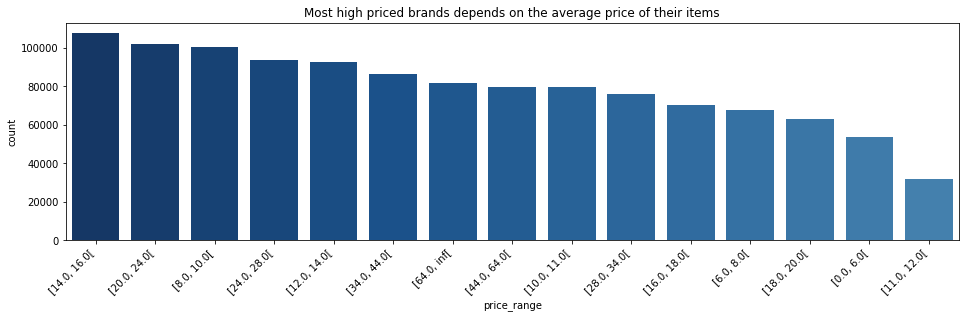

In [25]:
# plot the most high priced brand names depends on the average sale price of their items
df_ = df.groupby('price_range')[TARGET].count().reset_index()
df_.columns = ['price_range', 'count']
df_ = df_.sort_values('count', ascending=False)

plot_bars('Most high priced brands depends on the average price of their items', df_, x='price_range', y='count', n_bars=40)